In [1]:
import os
WORKDIR = os.getcwd()

<AxesSubplot:xlabel='date'>

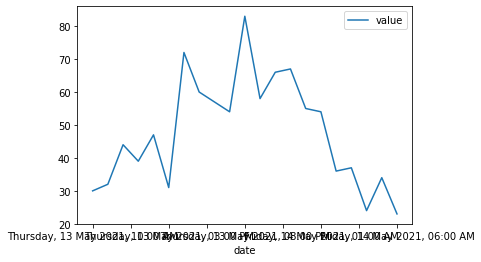

In [2]:
# Reading air quality sensor data obtained from CPCB platform
import pandas as pd
import json
import matplotlib.pyplot as plt


with open(WORKDIR+'/datasets/sdata6.json') as f:
    data = json.load(f)
print()
columns = data['chartData'][0][0][:2]
columns.append('color')
df = pd.DataFrame(data['chartData'][0][1:], columns=columns)
del df['color']
df = df.dropna().reset_index(drop=True)
df.plot(x='date', y='value', kind='line')

In [3]:
# Air quality sensor location

import geopandas as gpd
gdf = gpd.read_file(WORKDIR+'/datasets/aq_stations.geojson')
gdf.head()

,id,name,geometry
0,1,"Mandir Marg, Delhi - DPCC",POINT (77.20106 28.63643)
1,2,"Chandni Chowk, Delhi - IITM",POINT (77.22723 28.65676)
2,3,"Loni, Ghaziabad - UPPCB",POINT (77.27879 28.75729)


C:\Users\Robocop\AppData\Local\Temp\ipykernel_16340\2101946006.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'] = gdf['geometry'].buffer(0.02)


<AxesSubplot:>

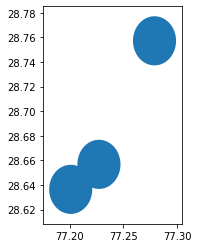

In [4]:
# Region of interest
gdf['geometry'] = gdf['geometry']
gdf['geometry'] = gdf['geometry'].buffer(0.02)

gdf.plot()

In [8]:
# Fetching Highways and Railways Data

hr_gpd = gpd.read_file(WORKDIR+'/datasets/highways_railways.geojson')

In [38]:
#Computing Road density
a1 = gdf.iloc[2]
print(a1['name'])
road_density = hr_gpd['geometry'].intersection(a1['geometry']).area
print(road_density.sum())


Loni, Ghaziabad - UPPCB
0.0


C:\Users\Robocop\AppData\Local\Temp\ipykernel_16340\3243578433.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  road_density = hr_gpd['geometry'].intersection(a1['geometry']).area


In [41]:
# Loading Forest Layer

for_gpd = gpd.read_file(WORKDIR+'/datasets/forests.geojson')
for_gpd['geometry'] = for_gpd['geometry'].buffer(0)
print(for_gpd)

    osm_id osm_way_id                          name          type aeroway  \
0  2090251       None  Central Ridge Reserve Forest  multipolygon    None   
1  3859702       None             Kamla Nehru Ridge      boundary    None   

  amenity admin_level barrier        boundary building  ... man_made military  \
0    None          10    None  administrative     None  ...     None     None   
1    None          10    None  administrative     None  ...     None     None   

  natural office place  shop sport tourism  \
0    None   None  None  None  None    None   
1    None   None  None  None  None    None   

                                          other_tags  \
0  "alt_name"=>"Delhi Ridge","alt_name:ur"=>"Ø¯Û...   
1                                               None   

                                            geometry  
0  POLYGON ((77.19789 28.64424, 77.20275 28.64239...  
1  POLYGON ((77.21223 28.67971, 77.21261 28.67983...  

[2 rows x 26 columns]


In [37]:
#Computing Forest density
a1 = gdf.iloc[0]
print(a1['name'])
forest_density = for_gpd['geometry'].intersection(a1['geometry']).length
print(forest_density.sum())

TopologyException: Input geom 0 is invalid: Nested shells at 77.165710700000005 28.628235499999999


Mandir Marg, Delhi - DPCC


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.multipolygon.MultiPolygon object at 0x0000021678A6FE20>